In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
dataset = pd.read_csv('CSV\Data Prototype 3a.csv')
dataset.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,ff_x,ddd_x,ff_avg,ddd_car,bulan,RH_avg_5day,RH1,RH2,RH3,ff_x1,ff_x2,ff_x3,RR_avg5_day,RR1,RR2,RR3,RR
0,06-02-2010,24.7,29.4,26.5,85.0,7.0,240.0,2.0,7,2,80.4,81.0,80.0,80.0,7.0,9.0,9.0,3.560000,2.5,0.80000,1.70000,0.20000
1,07-02-2010,25.0,32.2,27.5,83.0,7.0,120.0,2.0,5,2,81.0,80.0,80.0,85.0,9.0,9.0,7.0,3.480000,0.8,1.70000,0.20000,16.10000
2,08-02-2010,25.2,32.5,27.4,81.0,10.0,100.0,2.0,8,2,81.8,80.0,85.0,83.0,9.0,7.0,7.0,4.260000,1.7,0.20000,16.10000,8.33913
3,09-02-2010,25.0,32.0,27.2,82.0,6.0,100.0,2.0,3,2,81.8,85.0,83.0,81.0,7.0,7.0,10.0,5.427826,0.2,16.10000,8.33913,0.00000
4,10-02-2010,24.2,32.2,28.1,82.0,7.0,200.0,2.0,5,2,82.2,83.0,81.0,82.0,7.0,10.0,6.0,5.267826,16.1,8.33913,0.00000,7.70000


In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Tn,2987.0,24.505217,0.986270,18.0,24.000000,24.600000,25.188385,27.900000
Tx,2981.0,30.964174,1.608543,3.6,30.000000,31.200000,32.100000,36.000000
Tavg,2989.0,27.265009,1.128515,23.2,26.600000,27.400000,28.000000,30.700000
RH_avg,2988.0,82.781296,4.080208,41.0,80.000000,83.000000,85.000000,97.000000
ff_x,2988.0,6.100179,2.474871,0.0,4.000000,6.000000,8.000000,36.000000
ddd_x,2988.0,165.489971,66.810621,0.0,120.000000,140.000000,220.000000,360.000000
ff_avg,2989.0,2.180653,1.092883,0.0,1.000000,2.000000,3.000000,7.000000
ddd_car,2989.0,3.742723,2.318741,1.0,1.000000,4.000000,5.000000,9.000000
bulan,2989.0,6.324189,3.464433,1.0,3.000000,6.000000,9.000000,12.000000
RH_avg_5day,2989.0,82.777564,2.874954,68.6,81.000000,82.800000,84.600000,90.400000


In [4]:
dataset.shape

(2989, 22)

In [5]:
dataset[dataset.Tx<=20]

,Tanggal,Tn,Tx,Tavg,RH_avg,ff_x,ddd_x,ff_avg,ddd_car,bulan,RH_avg_5day,RH1,RH2,RH3,ff_x1,ff_x2,ff_x3,RR_avg5_day,RR1,RR2,RR3,RR
2427,13-05-2017,25.3,3.6,27.6,79.0,7.0,130.0,2.0,3,5,80.8,75.0,84.0,83.0,8.0,4.0,5.0,3.916471,8.541176,0.4,0.0,19.4


In [6]:
dataset = dataset.drop(dataset.index[2427])

In [7]:
dataset = dataset.dropna()

In [8]:
dataset = dataset.drop(columns = ['ff_avg','Tanggal'])

In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset)

In [10]:
dataset_scaled

array([[0.67676768, 0.44067797, 0.44      , ..., 0.00401003, 0.0085213 ,
        0.00100251],
       [0.70707071, 0.6779661 , 0.57333333, ..., 0.0085213 , 0.00100251,
        0.08070175],
       [0.72727273, 0.70338983, 0.56      , ..., 0.00100251, 0.08070175,
        0.04180015],
       ...,
       [0.70707071, 0.52542373, 0.6       , ..., 0.00250627, 0.05635517,
        0.00200501],
       [0.72783389, 0.59500446, 0.62814815, ..., 0.05635517, 0.00200501,
        0.05635517],
       [0.72783389, 0.62711864, 0.58666667, ..., 0.00200501, 0.05635517,
        0.05635517]])

In [11]:
dataset.columns

Index(['Tn', 'Tx', 'Tavg', 'RH_avg', 'ff_x', 'ddd_x', 'ddd_car', 'bulan',
       'RH_avg_5day', 'RH1', 'RH2', 'RH3', 'ff_x1', 'ff_x2', 'ff_x3',
       'RR_avg5_day', 'RR1', 'RR2', 'RR3', 'RR'],
      dtype='object')

In [12]:
dataset_scaled[:,19]

array([0.00100251, 0.08070175, 0.04180015, ..., 0.00200501, 0.05635517,
       0.05635517])

In [13]:
#Buat split data
#Buat X yg di drop yang target, y jadi target

X = np.delete(dataset_scaled,19,axis=1)
y = dataset_scaled[:,19]

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

In [15]:
X_train.shape[1]

19

In [16]:
X_test2 = X_test

In [17]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

In [18]:
# Impor Keras dan library yang lain


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [19]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (1,19)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             14000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [21]:
# Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1])) 

In [22]:
X_train.shape

(2669, 1, 19)

In [23]:
def on_train_begin(self, logs=None):
    self.epoch = []
    self.history = {}
 
def on_epoch_end(self, epoch, logs=None):
    logs = logs or {}
    self.epoch.append(epoch)
    for k, v in logs.items():
        self.history.setdefault(k, []).append(v)

PERCOBAAN 1

In [24]:
pelatihan = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 200, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Train on 2402 samples, validate on 267 samples
Epoch 1/200
2402/2402 [==============================] - 8s 3ms/step - loss: 0.0106 - acc: 0.2348 - val_loss: 0.0131 - val_acc: 0.2022
Epoch 2/200
2402/2402 [==============================] - 2s 658us/step - loss: 0.0102 - acc: 0.2348 - val_loss: 0.0132 - val_acc: 0.2022
Epoch 3/200
2402/2402 [==============================] - 2s 645us/step - loss: 0.0098 - acc: 0.2348 - val_loss: 0.0122 - val_acc: 0.2022
Epoch 4/200
2402/2402 [==============================] - 2s 652us/step - loss: 0.0096 - acc: 0.2348 - val_loss: 0.0125 - val_acc: 0.2022
Epoch 5/200
2402/2402 [==============================] - 2s 650us/step - loss: 0.0094 - acc: 0.2348 - val_loss: 0.0122 - val_acc: 0.2022
Epoch 6/200
2402/2402 [==============================] - 2s 651us/step - loss: 0.0094 - acc: 0.2348 - val_loss: 0.0119 - val_acc: 0.2022 - loss: 0.0097 - acc: 0
Epoch 7/200
2402/2402 [==============================] - 2s 6

2402/2402 [==============================] - 2s 662us/step - loss: 0.0082 - acc: 0.2348 - val_loss: 0.0101 - val_acc: 0.2022: 1s - loss: 0.00
Epoch 58/200
2402/2402 [==============================] - 2s 667us/step - loss: 0.0081 - acc: 0.2348 - val_loss: 0.0098 - val_acc: 0.2022
Epoch 59/200
2402/2402 [==============================] - 2s 665us/step - loss: 0.0080 - acc: 0.2348 - val_loss: 0.0098 - val_acc: 0.2022
Epoch 60/200
2402/2402 [==============================] - 2s 673us/step - loss: 0.0080 - acc: 0.2348 - val_loss: 0.0097 - val_acc: 0.2022
Epoch 61/200
2402/2402 [==============================] - 2s 658us/step - loss: 0.0081 - acc: 0.2348 - val_loss: 0.0096 - val_acc: 0.2022
Epoch 62/200
2402/2402 [==============================] - 2s 655us/step - loss: 0.0079 - acc: 0.2348 - val_loss: 0.0095 - val_acc: 0.2022
Epoch 63/200
2402/2402 [==============================] - 2s 661us/step - loss: 0.0080 - acc: 0.2348 - val_loss: 0.0104 - val_acc: 0.2022
Epoch 64/200
2402/2402 [======

2402/2402 [==============================] - 2s 656us/step - loss: 0.0075 - acc: 0.2348 - val_loss: 0.0101 - val_acc: 0.2022
Epoch 117/200
2402/2402 [==============================] - 2s 659us/step - loss: 0.0076 - acc: 0.2348 - val_loss: 0.0095 - val_acc: 0.2022
Epoch 118/200
2402/2402 [==============================] - 2s 660us/step - loss: 0.0078 - acc: 0.2348 - val_loss: 0.0095 - val_acc: 0.2022
Epoch 119/200
2402/2402 [==============================] - 2s 674us/step - loss: 0.0074 - acc: 0.2348 - val_loss: 0.0099 - val_acc: 0.2022
Epoch 120/200
2402/2402 [==============================] - 2s 680us/step - loss: 0.0075 - acc: 0.2348 - val_loss: 0.0096 - val_acc: 0.2022
Epoch 121/200
2402/2402 [==============================] - 2s 650us/step - loss: 0.0077 - acc: 0.2348 - val_loss: 0.0095 - val_acc: 0.2022
Epoch 122/200
2402/2402 [==============================] - 2s 667us/step - loss: 0.0076 - acc: 0.2348 - val_loss: 0.0097 - val_acc: 0.2022
Epoch 123/200
2402/2402 [================

2402/2402 [==============================] - 2s 655us/step - loss: 0.0074 - acc: 0.2348 - val_loss: 0.0099 - val_acc: 0.2022
Epoch 176/200
2402/2402 [==============================] - 2s 676us/step - loss: 0.0073 - acc: 0.2348 - val_loss: 0.0099 - val_acc: 0.2022
Epoch 177/200
2402/2402 [==============================] - 2s 652us/step - loss: 0.0072 - acc: 0.2348 - val_loss: 0.0104 - val_acc: 0.2022
Epoch 178/200
2402/2402 [==============================] - 2s 652us/step - loss: 0.0071 - acc: 0.2348 - val_loss: 0.0097 - val_acc: 0.2022
Epoch 179/200
2402/2402 [==============================] - 2s 651us/step - loss: 0.0071 - acc: 0.2352 - val_loss: 0.0096 - val_acc: 0.2022
Epoch 180/200
2402/2402 [==============================] - 2s 649us/step - loss: 0.0072 - acc: 0.2348 - val_loss: 0.0104 - val_acc: 0.2022
Epoch 181/200
2402/2402 [==============================] - 2s 656us/step - loss: 0.0081 - acc: 0.2348 - val_loss: 0.0098 - val_acc: 0.2022
Epoch 182/200
2402/2402 [================

In [25]:
pelatihan.history

{'val_loss': [0.013124690558552072,
  0.013235181793291471,
  0.012208793706466419,
  0.012536295082713112,
  0.012211788459663534,
  0.011880395027079832,
  0.01177349408272277,
  0.011876436236422606,
  0.011725720830875613,
  0.011890675188896808,
  0.011672153618981999,
  0.012009508286913237,
  0.011720599331073323,
  0.011635067440178734,
  0.011737310418280099,
  0.01143435515770305,
  0.011603164019181711,
  0.011375376857007935,
  0.011731910132122844,
  0.011740348643661662,
  0.011179533344083064,
  0.011383935052217839,
  0.011343316485484442,
  0.01082034595833903,
  0.010829003819016816,
  0.010546849798132083,
  0.011545033392946371,
  0.01037250498784113,
  0.010282679954508829,
  0.010426280139300149,
  0.010065247081499197,
  0.01095628466680367,
  0.01096743472576253,
  0.010489639383130306,
  0.009891758925780264,
  0.009663237965132078,
  0.010050378467762069,
  0.009906602372879282,
  0.009837012188613749,
  0.009454593685026585,
  0.010680368171886223,
  0.010212

In [26]:
def plot_history(pelatihan):
    history_dict = pelatihan.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    epochs = range(1, len(acc_values) + 1)
    
    plt.plot(epochs, loss_values, 'b', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.plot(epochs, acc_values, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Validation')
    plt.legend()
    plt.show()

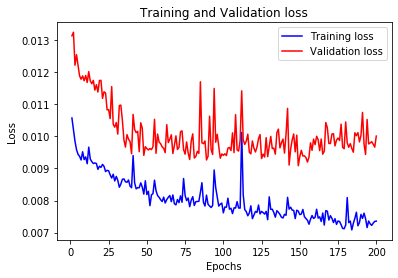

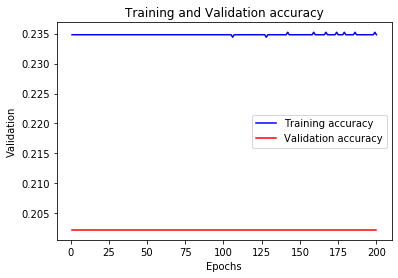

In [27]:
plot_history(pelatihan)

In [28]:
pelatihan.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [29]:
import statistics as stats

In [30]:
loss_mean1 = stats.mean(pelatihan.history['loss'])
loss_mean1

0.008042788486890506

In [31]:
acc_mean1 = stats.mean(pelatihan.history['acc'])
acc_mean1

0.23481473771856784

In [32]:
valloss_mean1 = stats.mean(pelatihan.history['val_loss'])
valloss_mean1

0.010089186643632234

In [33]:
val_acc_mean1 = stats.mean(pelatihan.history['val_acc'])
val_acc_mean1

0.2022471913460935

In [34]:
X_test.shape

(297, 19)

In [35]:
X_testReal = X_test

In [36]:
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [37]:
predicted_RR = regressor.predict(X_test)

In [38]:
predicted_RR.shape

(297, 1)

In [39]:
predicted_RReal = np.hstack((X_testReal,predicted_RR))

In [40]:
predicted_RReal.shape

(297, 20)

In [41]:
predicted_RReal_a = sc.inverse_transform(predicted_RReal)

In [42]:
percobaan1 = predicted_RReal_a[:,19]

In [43]:
y_testReal = np.asarray(y_test)

In [44]:
y_testReal.shape[0]

297

In [45]:
y_testReal = np.reshape(y_testReal,(y_testReal.shape[0],1))

In [46]:
real_data = np.hstack((X_testReal,y_testReal))

In [47]:
real_data = sc.inverse_transform(real_data)

In [48]:
real_data.shape

(297, 20)

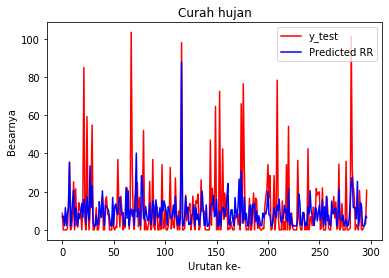

In [49]:
# Visualising the results
plt.plot(real_data[:,19], color = 'red', label = 'y_test')
plt.plot(percobaan1, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [50]:
evals = regressor.evaluate(X_test,y_test) #MSE
evals

297/297 [==============================] - 0s 259us/step


[0.005792234312454458, 0.27609427614444837]

In [51]:
evals

[0.005792234312454458, 0.27609427614444837]

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
mse1 = mean_squared_error(real_data[:,19],percobaan1)
mse1

230.5323708249582

PERCOBAAN 2

In [54]:
pelatihan2 = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 200, batch_size = 32)

Train on 2402 samples, validate on 267 samples
Epoch 1/200
2402/2402 [==============================] - 2s 673us/step - loss: 0.0073 - acc: 0.2352 - val_loss: 0.0104 - val_acc: 0.2022
Epoch 2/200
2402/2402 [==============================] - 2s 657us/step - loss: 0.0072 - acc: 0.2348 - val_loss: 0.0097 - val_acc: 0.2022
Epoch 3/200
2402/2402 [==============================] - 2s 657us/step - loss: 0.0073 - acc: 0.2348 - val_loss: 0.0098 - val_acc: 0.2022
Epoch 4/200
2402/2402 [==============================] - 2s 658us/step - loss: 0.0073 - acc: 0.2352 - val_loss: 0.0098 - val_acc: 0.2022
Epoch 5/200
2402/2402 [==============================] - 2s 664us/step - loss: 0.0072 - acc: 0.2348 - val_loss: 0.0101 - val_acc: 0.2022
Epoch 6/200
2402/2402 [==============================] - 2s 657us/step - loss: 0.0076 - acc: 0.2348 - val_loss: 0.0098 - val_acc: 0.2022
Epoch 7/200
2402/2402 [==============================] - 2s 657us/step - loss: 0.0070 - acc: 0.2348 - val_loss: 0.0097 - val_acc: 0

2402/2402 [==============================] - 2s 664us/step - loss: 0.0071 - acc: 0.2352 - val_loss: 0.0097 - val_acc: 0.2022
Epoch 61/200
2402/2402 [==============================] - 2s 657us/step - loss: 0.0069 - acc: 0.2352 - val_loss: 0.0098 - val_acc: 0.2022
Epoch 62/200
2402/2402 [==============================] - 2s 657us/step - loss: 0.0070 - acc: 0.2352 - val_loss: 0.0099 - val_acc: 0.2022
Epoch 63/200
2402/2402 [==============================] - 2s 655us/step - loss: 0.0068 - acc: 0.2352 - val_loss: 0.0105 - val_acc: 0.2022
Epoch 64/200
2402/2402 [==============================] - 2s 646us/step - loss: 0.0069 - acc: 0.2352 - val_loss: 0.0101 - val_acc: 0.2022
Epoch 65/200
2402/2402 [==============================] - 2s 654us/step - loss: 0.0071 - acc: 0.2352 - val_loss: 0.0108 - val_acc: 0.2022
Epoch 66/200
2402/2402 [==============================] - 2s 655us/step - loss: 0.0071 - acc: 0.2348 - val_loss: 0.0099 - val_acc: 0.2022
Epoch 67/200
2402/2402 [=======================

2402/2402 [==============================] - 2s 657us/step - loss: 0.0068 - acc: 0.2352 - val_loss: 0.0098 - val_acc: 0.2022
Epoch 120/200
2402/2402 [==============================] - 2s 658us/step - loss: 0.0066 - acc: 0.2352 - val_loss: 0.0101 - val_acc: 0.2022
Epoch 121/200
2402/2402 [==============================] - 2s 656us/step - loss: 0.0070 - acc: 0.2352 - val_loss: 0.0110 - val_acc: 0.2022
Epoch 122/200
2402/2402 [==============================] - 2s 652us/step - loss: 0.0068 - acc: 0.2352 - val_loss: 0.0101 - val_acc: 0.2022
Epoch 123/200
2402/2402 [==============================] - 2s 651us/step - loss: 0.0068 - acc: 0.2352 - val_loss: 0.0104 - val_acc: 0.2022
Epoch 124/200
2402/2402 [==============================] - 2s 647us/step - loss: 0.0069 - acc: 0.2352 - val_loss: 0.0100 - val_acc: 0.2022
Epoch 125/200
2402/2402 [==============================] - 2s 650us/step - loss: 0.0068 - acc: 0.2352 - val_loss: 0.0110 - val_acc: 0.2022
Epoch 126/200
2402/2402 [================

Epoch 178/200
2402/2402 [==============================] - 2s 648us/step - loss: 0.0076 - acc: 0.2348 - val_loss: 0.0092 - val_acc: 0.2022
Epoch 179/200
2402/2402 [==============================] - 2s 667us/step - loss: 0.0077 - acc: 0.2348 - val_loss: 0.0097 - val_acc: 0.2022
Epoch 180/200
2402/2402 [==============================] - 2s 659us/step - loss: 0.0074 - acc: 0.2348 - val_loss: 0.0093 - val_acc: 0.2022
Epoch 181/200
2402/2402 [==============================] - 2s 650us/step - loss: 0.0072 - acc: 0.2348 - val_loss: 0.0089 - val_acc: 0.2022
Epoch 182/200
2402/2402 [==============================] - 2s 664us/step - loss: 0.0072 - acc: 0.2348 - val_loss: 0.0091 - val_acc: 0.2022
Epoch 183/200
2402/2402 [==============================] - 2s 654us/step - loss: 0.0071 - acc: 0.2352 - val_loss: 0.0097 - val_acc: 0.2022
Epoch 184/200
2402/2402 [==============================] - 2s 653us/step - loss: 0.0069 - acc: 0.2348 - val_loss: 0.0101 - val_acc: 0.2022
Epoch 185/200
2402/2402 [==

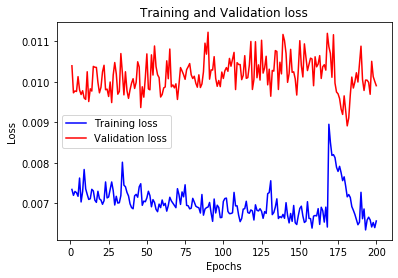

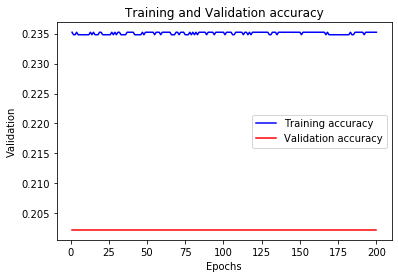

In [55]:
plot_history(pelatihan2)

In [56]:
loss_mean2 = stats.mean(pelatihan2.history['loss'])
loss_mean2

0.007004429226005344

In [57]:
acc_mean2 = stats.mean(pelatihan2.history['acc'])
acc_mean2

0.23506661115736885

In [58]:
valloss_mean2 = stats.mean(pelatihan2.history['val_loss'])
valloss_mean2

0.010159964093638493

In [59]:
val_acc_mean2 = stats.mean(pelatihan2.history['val_acc'])
val_acc_mean2

0.2022471913460935

In [60]:
predicted_RR2 = regressor.predict(X_test)

In [61]:
predicted_RR2.shape

(297, 1)

In [62]:
predicted_RReal2 = np.hstack((X_testReal,predicted_RR2))

In [63]:
predicted_RReal_b = sc.inverse_transform(predicted_RReal2)

In [64]:
percobaan2 = predicted_RReal_b[:,19] 

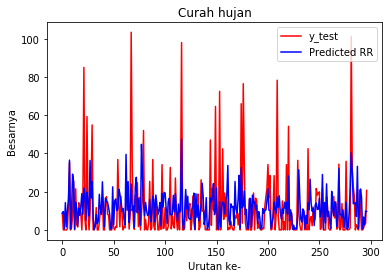

In [65]:
# Visualising the results
plt.plot(real_data[:,19], color = 'red', label = 'y_test')
plt.plot(percobaan2, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [66]:
mse2 = mean_squared_error(real_data[:,19],percobaan2)
mse2

224.62856645018638

PERCOBAAN 3

In [67]:
pelatihan3 = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 200, batch_size = 32)

Train on 2402 samples, validate on 267 samples
Epoch 1/200
2402/2402 [==============================] - 2s 664us/step - loss: 0.0064 - acc: 0.2352 - val_loss: 0.0099 - val_acc: 0.2022
Epoch 2/200
2402/2402 [==============================] - 2s 651us/step - loss: 0.0065 - acc: 0.2352 - val_loss: 0.0103 - val_acc: 0.2022
Epoch 3/200
2402/2402 [==============================] - 2s 642us/step - loss: 0.0067 - acc: 0.2352 - val_loss: 0.0101 - val_acc: 0.2022
Epoch 4/200
2402/2402 [==============================] - 2s 653us/step - loss: 0.0065 - acc: 0.2352 - val_loss: 0.0097 - val_acc: 0.2022
Epoch 5/200
2402/2402 [==============================] - 2s 649us/step - loss: 0.0067 - acc: 0.2352 - val_loss: 0.0105 - val_acc: 0.2022
Epoch 6/200
2402/2402 [==============================] - 2s 656us/step - loss: 0.0063 - acc: 0.2352 - val_loss: 0.0106 - val_acc: 0.2022
Epoch 7/200
2402/2402 [==============================] - 2s 647us/step - loss: 0.0063 - acc: 0.2352 - val_loss: 0.0106 - val_acc: 0

Epoch 60/200
2402/2402 [==============================] - 2s 654us/step - loss: 0.0064 - acc: 0.2352 - val_loss: 0.0110 - val_acc: 0.2022
Epoch 61/200
2402/2402 [==============================] - 2s 650us/step - loss: 0.0065 - acc: 0.2348 - val_loss: 0.0107 - val_acc: 0.2022
Epoch 62/200
2402/2402 [==============================] - 2s 650us/step - loss: 0.0067 - acc: 0.2352 - val_loss: 0.0100 - val_acc: 0.2022
Epoch 63/200
2402/2402 [==============================] - 2s 655us/step - loss: 0.0066 - acc: 0.2352 - val_loss: 0.0114 - val_acc: 0.2022
Epoch 64/200
2402/2402 [==============================] - 2s 651us/step - loss: 0.0065 - acc: 0.2352 - val_loss: 0.0106 - val_acc: 0.2022
Epoch 65/200
2402/2402 [==============================] - 2s 662us/step - loss: 0.0066 - acc: 0.2352 - val_loss: 0.0106 - val_acc: 0.2022
Epoch 66/200
2402/2402 [==============================] - 2s 667us/step - loss: 0.0062 - acc: 0.2352 - val_loss: 0.0109 - val_acc: 0.2022
Epoch 67/200
2402/2402 [==========

2402/2402 [==============================] - 2s 654us/step - loss: 0.0060 - acc: 0.2352 - val_loss: 0.0105 - val_acc: 0.2022
Epoch 119/200
2402/2402 [==============================] - 2s 657us/step - loss: 0.0061 - acc: 0.2352 - val_loss: 0.0108 - val_acc: 0.2022
Epoch 120/200
2402/2402 [==============================] - 2s 643us/step - loss: 0.0070 - acc: 0.2352 - val_loss: 0.0107 - val_acc: 0.2022
Epoch 121/200
2402/2402 [==============================] - 2s 654us/step - loss: 0.0061 - acc: 0.2352 - val_loss: 0.0110 - val_acc: 0.2022
Epoch 122/200
2402/2402 [==============================] - 2s 656us/step - loss: 0.0062 - acc: 0.2352 - val_loss: 0.0112 - val_acc: 0.2022
Epoch 123/200
2402/2402 [==============================] - 2s 646us/step - loss: 0.0065 - acc: 0.2352 - val_loss: 0.0102 - val_acc: 0.2022
Epoch 124/200
2402/2402 [==============================] - 2s 650us/step - loss: 0.0062 - acc: 0.2352 - val_loss: 0.0106 - val_acc: 0.2022
Epoch 125/200
2402/2402 [================

Epoch 177/200
2402/2402 [==============================] - 2s 653us/step - loss: 0.0061 - acc: 0.2352 - val_loss: 0.0109 - val_acc: 0.2022
Epoch 178/200
2402/2402 [==============================] - 2s 645us/step - loss: 0.0059 - acc: 0.2352 - val_loss: 0.0108 - val_acc: 0.2022
Epoch 179/200
2402/2402 [==============================] - 2s 677us/step - loss: 0.0063 - acc: 0.2352 - val_loss: 0.0103 - val_acc: 0.2022
Epoch 180/200
2402/2402 [==============================] - 2s 651us/step - loss: 0.0060 - acc: 0.2352 - val_loss: 0.0107 - val_acc: 0.2022
Epoch 181/200
2402/2402 [==============================] - 2s 657us/step - loss: 0.0061 - acc: 0.2352 - val_loss: 0.0105 - val_acc: 0.2022
Epoch 182/200
2402/2402 [==============================] - 2s 653us/step - loss: 0.0058 - acc: 0.2352 - val_loss: 0.0102 - val_acc: 0.2022
Epoch 183/200
2402/2402 [==============================] - 2s 649us/step - loss: 0.0057 - acc: 0.2352 - val_loss: 0.0108 - val_acc: 0.2022
Epoch 184/200
2402/2402 [==

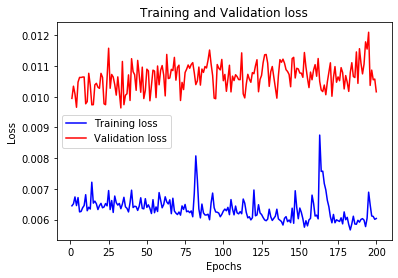

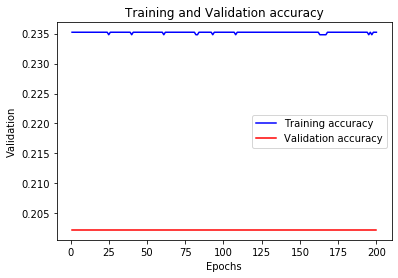

In [68]:
plot_history(pelatihan3)

In [69]:
loss_mean3 = stats.mean(pelatihan3.history['loss'])
loss_mean3

0.0063354799972858014

In [70]:
acc_mean3 = stats.mean(pelatihan3.history['acc'])
acc_mean3

0.23519150707743547

In [71]:
valloss_mean3 = stats.mean(pelatihan3.history['val_loss'])
valloss_mean3

0.010652216956553953

In [72]:
val_acc_mean3 = stats.mean(pelatihan3.history['val_acc'])
val_acc_mean3

0.2022471913460935

In [73]:
predicted_RR3 = regressor.predict(X_test)

In [74]:
predicted_RR3.shape

(297, 1)

In [75]:
predicted_RReal3 = np.hstack((X_testReal,predicted_RR3))

In [76]:
predicted_RReal_c = sc.inverse_transform(predicted_RReal3)

In [77]:
percobaan3 = predicted_RReal_c[:,19] 

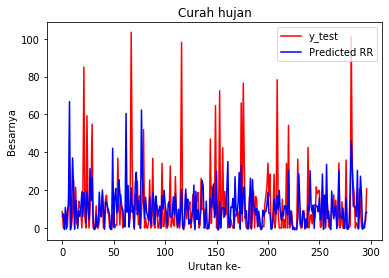

In [78]:
# Visualising the results
plt.plot(real_data[:,19], color = 'red', label = 'y_test')
plt.plot(percobaan3, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [79]:
mse3 = mean_squared_error(real_data[:,19],percobaan3)
mse3

257.4070885478975

PERCOBAAN 4

In [80]:
pelatihan4 = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 200, batch_size = 32)

Train on 2402 samples, validate on 267 samples
Epoch 1/200
2402/2402 [==============================] - 2s 665us/step - loss: 0.0058 - acc: 0.2352 - val_loss: 0.0106 - val_acc: 0.2022
Epoch 2/200
2402/2402 [==============================] - 2s 649us/step - loss: 0.0059 - acc: 0.2352 - val_loss: 0.0103 - val_acc: 0.2022
Epoch 3/200
2402/2402 [==============================] - 2s 651us/step - loss: 0.0059 - acc: 0.2352 - val_loss: 0.0107 - val_acc: 0.2022
Epoch 4/200
2402/2402 [==============================] - 2s 650us/step - loss: 0.0057 - acc: 0.2352 - val_loss: 0.0106 - val_acc: 0.2022
Epoch 5/200
2402/2402 [==============================] - 2s 656us/step - loss: 0.0059 - acc: 0.2352 - val_loss: 0.0104 - val_acc: 0.2022
Epoch 6/200
2402/2402 [==============================] - 2s 645us/step - loss: 0.0058 - acc: 0.2352 - val_loss: 0.0105 - val_acc: 0.2022
Epoch 7/200
2402/2402 [==============================] - 2s 652us/step - loss: 0.0056 - acc: 0.2352 - val_loss: 0.0105 - val_acc: 0

2402/2402 [==============================] - 2s 648us/step - loss: 0.0058 - acc: 0.2352 - val_loss: 0.0119 - val_acc: 0.2022
Epoch 61/200
2402/2402 [==============================] - 2s 658us/step - loss: 0.0056 - acc: 0.2352 - val_loss: 0.0113 - val_acc: 0.2022
Epoch 62/200
2402/2402 [==============================] - 2s 651us/step - loss: 0.0055 - acc: 0.2352 - val_loss: 0.0110 - val_acc: 0.2022
Epoch 63/200
2402/2402 [==============================] - 2s 654us/step - loss: 0.0059 - acc: 0.2352 - val_loss: 0.0106 - val_acc: 0.2022
Epoch 64/200
2402/2402 [==============================] - 2s 646us/step - loss: 0.0055 - acc: 0.2352 - val_loss: 0.0120 - val_acc: 0.2022
Epoch 65/200
2402/2402 [==============================] - 2s 636us/step - loss: 0.0056 - acc: 0.2352 - val_loss: 0.0117 - val_acc: 0.2022
Epoch 66/200
2402/2402 [==============================] - 2s 657us/step - loss: 0.0056 - acc: 0.2352 - val_loss: 0.0122 - val_acc: 0.2022
Epoch 67/200
2402/2402 [=======================

2402/2402 [==============================] - 2s 664us/step - loss: 0.0056 - acc: 0.2352 - val_loss: 0.0120 - val_acc: 0.2022
Epoch 119/200
2402/2402 [==============================] - 2s 654us/step - loss: 0.0056 - acc: 0.2352 - val_loss: 0.0120 - val_acc: 0.2022
Epoch 120/200
2402/2402 [==============================] - 2s 649us/step - loss: 0.0053 - acc: 0.2352 - val_loss: 0.0125 - val_acc: 0.2022
Epoch 121/200
2402/2402 [==============================] - 2s 656us/step - loss: 0.0056 - acc: 0.2352 - val_loss: 0.0124 - val_acc: 0.2022
Epoch 122/200
2402/2402 [==============================] - 2s 654us/step - loss: 0.0057 - acc: 0.2352 - val_loss: 0.0123 - val_acc: 0.2022
Epoch 123/200
2402/2402 [==============================] - 2s 648us/step - loss: 0.0051 - acc: 0.2352 - val_loss: 0.0116 - val_acc: 0.2022
Epoch 124/200
2402/2402 [==============================] - 2s 655us/step - loss: 0.0058 - acc: 0.2352 - val_loss: 0.0120 - val_acc: 0.2022
Epoch 125/200
2402/2402 [================

Epoch 177/200
2402/2402 [==============================] - 2s 656us/step - loss: 0.0051 - acc: 0.2352 - val_loss: 0.0118 - val_acc: 0.2022
Epoch 178/200
2402/2402 [==============================] - 2s 644us/step - loss: 0.0059 - acc: 0.2352 - val_loss: 0.0118 - val_acc: 0.2022
Epoch 179/200
2402/2402 [==============================] - 2s 658us/step - loss: 0.0054 - acc: 0.2352 - val_loss: 0.0119 - val_acc: 0.2022
Epoch 180/200
2402/2402 [==============================] - 2s 659us/step - loss: 0.0053 - acc: 0.2352 - val_loss: 0.0119 - val_acc: 0.2022
Epoch 181/200
2402/2402 [==============================] - 2s 656us/step - loss: 0.0051 - acc: 0.2352 - val_loss: 0.0125 - val_acc: 0.2022
Epoch 182/200
2402/2402 [==============================] - 2s 648us/step - loss: 0.0052 - acc: 0.2352 - val_loss: 0.0114 - val_acc: 0.2022
Epoch 183/200
2402/2402 [==============================] - 2s 654us/step - loss: 0.0053 - acc: 0.2352 - val_loss: 0.0124 - val_acc: 0.2022
Epoch 184/200
2402/2402 [==

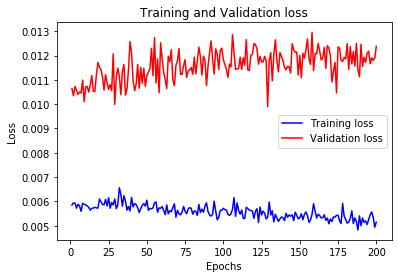

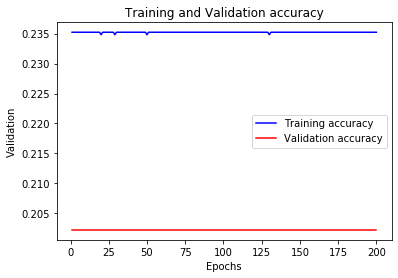

In [81]:
plot_history(pelatihan4)

In [82]:
loss_mean4 = stats.mean(pelatihan4.history['loss'])
loss_mean4

0.00557596692204352

In [83]:
acc_mean4 = stats.mean(pelatihan4.history['acc'])
acc_mean4

0.23521232306411324

In [84]:
valloss_mean4 = stats.mean(pelatihan4.history['val_loss'])
valloss_mean4

0.011571743754070071

In [85]:
val_acc_mean4 = stats.mean(pelatihan4.history['val_acc'])
val_acc_mean4

0.2022471913460935

In [86]:
predicted_RR4 = regressor.predict(X_test)

In [87]:
predicted_RR4.shape

(297, 1)

In [88]:
predicted_RReal4 = np.hstack((X_testReal,predicted_RR4))

In [89]:
predicted_RReal_d = sc.inverse_transform(predicted_RReal4)

In [90]:
percobaan4 = predicted_RReal_d[:,19] 

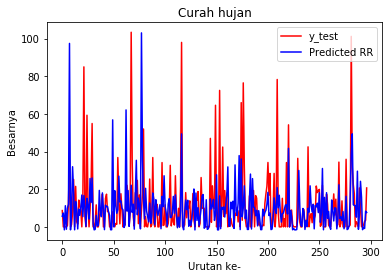

In [91]:
# Visualising the results
plt.plot(real_data[:,19], color = 'red', label = 'y_test')
plt.plot(percobaan4, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [92]:
mse4 = mean_squared_error(real_data[:,19],percobaan4)
mse4

283.2325588151479

PERCOBAAN 5

In [93]:
pelatihan5 = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 200, batch_size = 32)

Train on 2402 samples, validate on 267 samples
Epoch 1/200
2402/2402 [==============================] - 2s 665us/step - loss: 0.0051 - acc: 0.2352 - val_loss: 0.0119 - val_acc: 0.2022
Epoch 2/200
2402/2402 [==============================] - 2s 652us/step - loss: 0.0050 - acc: 0.2352 - val_loss: 0.0129 - val_acc: 0.2022
Epoch 3/200
2402/2402 [==============================] - 2s 655us/step - loss: 0.0052 - acc: 0.2352 - val_loss: 0.0128 - val_acc: 0.2022
Epoch 4/200
2402/2402 [==============================] - 2s 650us/step - loss: 0.0052 - acc: 0.2352 - val_loss: 0.0126 - val_acc: 0.2022
Epoch 5/200
2402/2402 [==============================] - 2s 650us/step - loss: 0.0058 - acc: 0.2352 - val_loss: 0.0118 - val_acc: 0.2022
Epoch 6/200
2402/2402 [==============================] - 2s 653us/step - loss: 0.0064 - acc: 0.2348 - val_loss: 0.0121 - val_acc: 0.2022
Epoch 7/200
2402/2402 [==============================] - 2s 647us/step - loss: 0.0051 - acc: 0.2352 - val_loss: 0.0126 - val_acc: 0

Epoch 60/200
2402/2402 [==============================] - 2s 649us/step - loss: 0.0052 - acc: 0.2352 - val_loss: 0.0125 - val_acc: 0.2022
Epoch 61/200
2402/2402 [==============================] - 2s 653us/step - loss: 0.0052 - acc: 0.2352 - val_loss: 0.0121 - val_acc: 0.2022
Epoch 62/200
2402/2402 [==============================] - 2s 652us/step - loss: 0.0048 - acc: 0.2352 - val_loss: 0.0112 - val_acc: 0.2022
Epoch 63/200
2402/2402 [==============================] - 2s 646us/step - loss: 0.0053 - acc: 0.2352 - val_loss: 0.0118 - val_acc: 0.2022loss: 0.0050 - a
Epoch 64/200
2402/2402 [==============================] - 2s 647us/step - loss: 0.0052 - acc: 0.2352 - val_loss: 0.0133 - val_acc: 0.2022
Epoch 65/200
2402/2402 [==============================] - 2s 649us/step - loss: 0.0049 - acc: 0.2352 - val_loss: 0.0114 - val_acc: 0.2022
Epoch 66/200
2402/2402 [==============================] - 2s 651us/step - loss: 0.0054 - acc: 0.2352 - val_loss: 0.0122 - val_acc: 0.2022
Epoch 67/200
2402/

2402/2402 [==============================] - 2s 652us/step - loss: 0.0046 - acc: 0.2352 - val_loss: 0.0139 - val_acc: 0.2022
Epoch 120/200
2402/2402 [==============================] - 2s 656us/step - loss: 0.0045 - acc: 0.2352 - val_loss: 0.0137 - val_acc: 0.2022
Epoch 121/200
2402/2402 [==============================] - 2s 653us/step - loss: 0.0047 - acc: 0.2352 - val_loss: 0.0126 - val_acc: 0.2022
Epoch 122/200
2402/2402 [==============================] - 2s 654us/step - loss: 0.0047 - acc: 0.2352 - val_loss: 0.0131 - val_acc: 0.2022
Epoch 123/200
2402/2402 [==============================] - 2s 647us/step - loss: 0.0049 - acc: 0.2352 - val_loss: 0.0122 - val_acc: 0.2022
Epoch 124/200
2402/2402 [==============================] - 2s 655us/step - loss: 0.0049 - acc: 0.2352 - val_loss: 0.0134 - val_acc: 0.2022
Epoch 125/200
2402/2402 [==============================] - 2s 653us/step - loss: 0.0048 - acc: 0.2352 - val_loss: 0.0123 - val_acc: 0.2022
Epoch 126/200
2402/2402 [================

Epoch 178/200
2402/2402 [==============================] - 2s 652us/step - loss: 0.0047 - acc: 0.2352 - val_loss: 0.0135 - val_acc: 0.2022
Epoch 179/200
2402/2402 [==============================] - 2s 647us/step - loss: 0.0049 - acc: 0.2352 - val_loss: 0.0136 - val_acc: 0.2022
Epoch 180/200
2402/2402 [==============================] - 2s 652us/step - loss: 0.0047 - acc: 0.2352 - val_loss: 0.0134 - val_acc: 0.2022
Epoch 181/200
2402/2402 [==============================] - 2s 653us/step - loss: 0.0043 - acc: 0.2352 - val_loss: 0.0129 - val_acc: 0.2022
Epoch 182/200
2402/2402 [==============================] - 2s 658us/step - loss: 0.0047 - acc: 0.2352 - val_loss: 0.0135 - val_acc: 0.2022
Epoch 183/200
2402/2402 [==============================] - 2s 656us/step - loss: 0.0044 - acc: 0.2352 - val_loss: 0.0138 - val_acc: 0.2022
Epoch 184/200
2402/2402 [==============================] - 2s 644us/step - loss: 0.0045 - acc: 0.2352 - val_loss: 0.0133 - val_acc: 0.2022
Epoch 185/200
2402/2402 [==

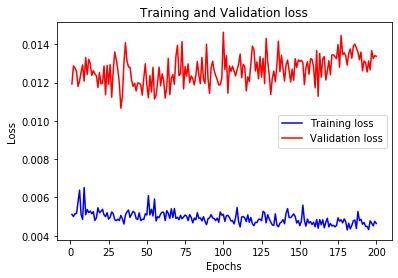

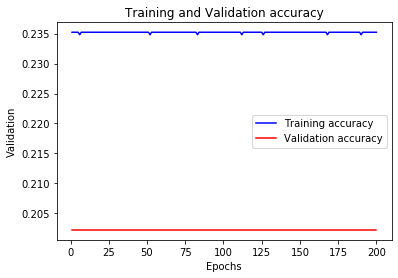

In [94]:
plot_history(pelatihan5)

In [95]:
loss_mean5 = stats.mean(pelatihan5.history['loss'])
loss_mean5

0.004926581801567584

In [96]:
acc_mean5 = stats.mean(pelatihan5.history['acc'])
acc_mean5

0.2352060782681099

In [97]:
valloss_mean5 = stats.mean(pelatihan5.history['val_loss'])
valloss_mean5

0.012654274620171567

In [98]:
val_acc_mean5 = stats.mean(pelatihan5.history['val_acc'])
val_acc_mean5

0.2022471913460935

In [99]:
predicted_RR5 = regressor.predict(X_test)

In [100]:
predicted_RR5.shape

(297, 1)

In [101]:
predicted_RReal5 = np.hstack((X_testReal,predicted_RR5))

In [102]:
predicted_RReal_e = sc.inverse_transform(predicted_RReal5)

In [103]:
percobaan5 = predicted_RReal_e[:,19] 

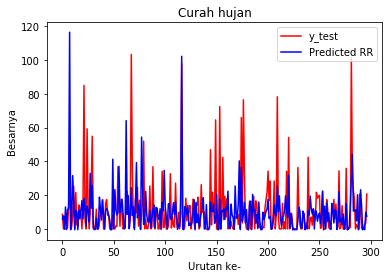

In [104]:
# Visualising the results
plt.plot(real_data[:,19], color = 'red', label = 'y_test')
plt.plot(percobaan5, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [105]:
mse5 = mean_squared_error(real_data[:,19],percobaan5)
mse5

262.2137060928762

In [106]:
meanRR1 = stats.mean(percobaan1)
meanRR1

9.297361828951221

In [107]:
meanRR2 = stats.mean(percobaan2)
meanRR2

11.802959979370687

In [108]:
meanRR3 = stats.mean(percobaan3)
meanRR3

10.538847265388778

In [109]:
meanRR4 = stats.mean(percobaan4)
meanRR4

10.151430028142652

In [110]:
meanRR5 = stats.mean(percobaan5)
meanRR5

10.069900087353707

# PENGATURAN PARAMETER

In [111]:
pelatihan6 = regressor.fit(X_train, y_train, validation_split = 0.10, epochs = 400, batch_size = 64)

Train on 2402 samples, validate on 267 samples
Epoch 1/400
2402/2402 [==============================] - 1s 350us/step - loss: 0.0046 - acc: 0.2352 - val_loss: 0.0132 - val_acc: 0.2022
Epoch 2/400
2402/2402 [==============================] - 1s 330us/step - loss: 0.0045 - acc: 0.2352 - val_loss: 0.0132 - val_acc: 0.2022
Epoch 3/400
2402/2402 [==============================] - 1s 327us/step - loss: 0.0043 - acc: 0.2352 - val_loss: 0.0133 - val_acc: 0.2022
Epoch 4/400
2402/2402 [==============================] - 1s 329us/step - loss: 0.0046 - acc: 0.2352 - val_loss: 0.0130 - val_acc: 0.2022
Epoch 5/400
2402/2402 [==============================] - 1s 326us/step - loss: 0.0042 - acc: 0.2352 - val_loss: 0.0133 - val_acc: 0.2022
Epoch 6/400
2402/2402 [==============================] - 1s 329us/step - loss: 0.0043 - acc: 0.2352 - val_loss: 0.0136 - val_acc: 0.2022
Epoch 7/400
2402/2402 [==============================] - 1s 324us/step - loss: 0.0043 - acc: 0.2352 - val_loss: 0.0133 - val_acc: 0

Epoch 60/400
2402/2402 [==============================] - 1s 326us/step - loss: 0.0043 - acc: 0.2352 - val_loss: 0.0133 - val_acc: 0.2022
Epoch 61/400
2402/2402 [==============================] - 1s 327us/step - loss: 0.0044 - acc: 0.2352 - val_loss: 0.0132 - val_acc: 0.2022
Epoch 62/400
2402/2402 [==============================] - 1s 328us/step - loss: 0.0042 - acc: 0.2352 - val_loss: 0.0132 - val_acc: 0.2022
Epoch 63/400
2402/2402 [==============================] - 1s 328us/step - loss: 0.0042 - acc: 0.2352 - val_loss: 0.0129 - val_acc: 0.2022
Epoch 64/400
2402/2402 [==============================] - 1s 331us/step - loss: 0.0042 - acc: 0.2352 - val_loss: 0.0128 - val_acc: 0.2022
Epoch 65/400
2402/2402 [==============================] - 1s 328us/step - loss: 0.0046 - acc: 0.2352 - val_loss: 0.0128 - val_acc: 0.2022
Epoch 66/400
2402/2402 [==============================] - 1s 333us/step - loss: 0.0046 - acc: 0.2352 - val_loss: 0.0139 - val_acc: 0.2022
Epoch 67/400
2402/2402 [==========

2402/2402 [==============================] - 1s 324us/step - loss: 0.0040 - acc: 0.2352 - val_loss: 0.0126 - val_acc: 0.2022
Epoch 120/400
2402/2402 [==============================] - 1s 327us/step - loss: 0.0046 - acc: 0.2352 - val_loss: 0.0140 - val_acc: 0.2022
Epoch 121/400
2402/2402 [==============================] - 1s 324us/step - loss: 0.0040 - acc: 0.2352 - val_loss: 0.0136 - val_acc: 0.2022
Epoch 122/400
2402/2402 [==============================] - 1s 327us/step - loss: 0.0040 - acc: 0.2352 - val_loss: 0.0136 - val_acc: 0.2022
Epoch 123/400
2402/2402 [==============================] - 1s 324us/step - loss: 0.0043 - acc: 0.2348 - val_loss: 0.0134 - val_acc: 0.2022
Epoch 124/400
2402/2402 [==============================] - 1s 327us/step - loss: 0.0043 - acc: 0.2352 - val_loss: 0.0138 - val_acc: 0.2022
Epoch 125/400
2402/2402 [==============================] - 1s 327us/step - loss: 0.0040 - acc: 0.2352 - val_loss: 0.0138 - val_acc: 0.2022
Epoch 126/400
2402/2402 [================

2402/2402 [==============================] - 1s 330us/step - loss: 0.0039 - acc: 0.2352 - val_loss: 0.0132 - val_acc: 0.2022
Epoch 179/400
2402/2402 [==============================] - 1s 327us/step - loss: 0.0039 - acc: 0.2352 - val_loss: 0.0133 - val_acc: 0.2022
Epoch 180/400
2402/2402 [==============================] - 1s 325us/step - loss: 0.0040 - acc: 0.2352 - val_loss: 0.0135 - val_acc: 0.2022
Epoch 181/400
2402/2402 [==============================] - 1s 325us/step - loss: 0.0045 - acc: 0.2352 - val_loss: 0.0130 - val_acc: 0.2022
Epoch 182/400
2402/2402 [==============================] - 1s 325us/step - loss: 0.0040 - acc: 0.2352 - val_loss: 0.0140 - val_acc: 0.2022
Epoch 183/400
2402/2402 [==============================] - 1s 327us/step - loss: 0.0039 - acc: 0.2352 - val_loss: 0.0142 - val_acc: 0.2022
Epoch 184/400
2402/2402 [==============================] - 1s 334us/step - loss: 0.0041 - acc: 0.2352 - val_loss: 0.0138 - val_acc: 0.2022
Epoch 185/400
2402/2402 [================

2402/2402 [==============================] - 1s 330us/step - loss: 0.0041 - acc: 0.2352 - val_loss: 0.0136 - val_acc: 0.2022
Epoch 238/400
2402/2402 [==============================] - 1s 324us/step - loss: 0.0038 - acc: 0.2352 - val_loss: 0.0132 - val_acc: 0.2022
Epoch 239/400
2402/2402 [==============================] - 1s 326us/step - loss: 0.0038 - acc: 0.2352 - val_loss: 0.0131 - val_acc: 0.2022
Epoch 240/400
2402/2402 [==============================] - 1s 326us/step - loss: 0.0040 - acc: 0.2352 - val_loss: 0.0126 - val_acc: 0.2022
Epoch 241/400
2402/2402 [==============================] - 1s 324us/step - loss: 0.0040 - acc: 0.2352 - val_loss: 0.0132 - val_acc: 0.2022
Epoch 242/400
2402/2402 [==============================] - 1s 327us/step - loss: 0.0040 - acc: 0.2352 - val_loss: 0.0133 - val_acc: 0.2022
Epoch 243/400
2402/2402 [==============================] - 1s 330us/step - loss: 0.0039 - acc: 0.2352 - val_loss: 0.0135 - val_acc: 0.2022
Epoch 244/400
2402/2402 [================

2402/2402 [==============================] - 1s 342us/step - loss: 0.0037 - acc: 0.2352 - val_loss: 0.0136 - val_acc: 0.2022
Epoch 297/400
2402/2402 [==============================] - 1s 346us/step - loss: 0.0037 - acc: 0.2352 - val_loss: 0.0133 - val_acc: 0.2022
Epoch 298/400
2402/2402 [==============================] - 1s 367us/step - loss: 0.0037 - acc: 0.2352 - val_loss: 0.0135 - val_acc: 0.2022
Epoch 299/400
2402/2402 [==============================] - 1s 355us/step - loss: 0.0040 - acc: 0.2352 - val_loss: 0.0134 - val_acc: 0.2022
Epoch 300/400
2402/2402 [==============================] - 1s 328us/step - loss: 0.0038 - acc: 0.2352 - val_loss: 0.0137 - val_acc: 0.2022
Epoch 301/400
2402/2402 [==============================] - 1s 328us/step - loss: 0.0038 - acc: 0.2352 - val_loss: 0.0136 - val_acc: 0.2022
Epoch 302/400
2402/2402 [==============================] - 1s 326us/step - loss: 0.0038 - acc: 0.2352 - val_loss: 0.0131 - val_acc: 0.2022
Epoch 303/400
2402/2402 [================

Epoch 355/400
2402/2402 [==============================] - 1s 326us/step - loss: 0.0038 - acc: 0.2352 - val_loss: 0.0132 - val_acc: 0.2022
Epoch 356/400
2402/2402 [==============================] - 1s 332us/step - loss: 0.0039 - acc: 0.2352 - val_loss: 0.0133 - val_acc: 0.2022
Epoch 357/400
2402/2402 [==============================] - 1s 326us/step - loss: 0.0037 - acc: 0.2352 - val_loss: 0.0136 - val_acc: 0.2022
Epoch 358/400
2402/2402 [==============================] - 1s 326us/step - loss: 0.0035 - acc: 0.2352 - val_loss: 0.0135 - val_acc: 0.2022
Epoch 359/400
2402/2402 [==============================] - 1s 327us/step - loss: 0.0036 - acc: 0.2352 - val_loss: 0.0137 - val_acc: 0.2022
Epoch 360/400
2402/2402 [==============================] - 1s 328us/step - loss: 0.0034 - acc: 0.2352 - val_loss: 0.0138 - val_acc: 0.2022
Epoch 361/400
2402/2402 [==============================] - 1s 326us/step - loss: 0.0034 - acc: 0.2352 - val_loss: 0.0140 - val_acc: 0.2022
Epoch 362/400
2402/2402 [==

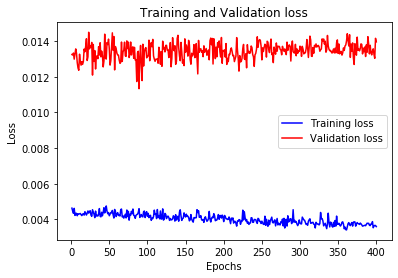

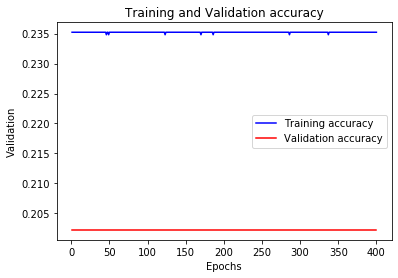

In [112]:
plot_history(pelatihan6)

In [113]:
loss_mean6 = stats.mean(pelatihan6.history['loss'])
loss_mean6

0.004032845629740612

In [114]:
acc_mean6 = stats.mean(pelatihan6.history['acc'])
acc_mean6

0.23521336395764175

In [115]:
valloss_mean6 = stats.mean(pelatihan6.history['val_loss'])
valloss_mean6

0.013429241966310547

In [116]:
val_acc_mean6 = stats.mean(pelatihan6.history['val_acc'])
val_acc_mean6

0.2022471913460935

In [117]:
predicted_RR6 = regressor.predict(X_test)

In [118]:
predicted_RR6.shape

(297, 1)

In [119]:
predicted_RReal6 = np.hstack((X_testReal,predicted_RR6))

In [120]:
predicted_RReal_f = sc.inverse_transform(predicted_RReal6)

In [121]:
percobaan6 = predicted_RReal_f[:,19] 

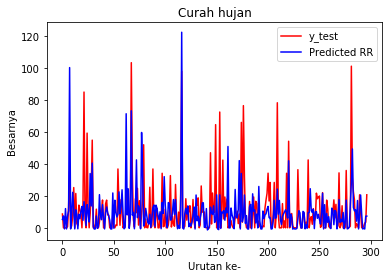

In [122]:
# Visualising the results
plt.plot(real_data[:,19], color = 'red', label = 'y_test')
plt.plot(percobaan6, color = 'blue', label = 'Predicted RR')
plt.title('Curah hujan')
plt.xlabel('Urutan ke-')
plt.ylabel('Besarnya')
plt.legend()
plt.show()

In [123]:
mse6 = mean_squared_error(real_data[:,19],percobaan6)
mse6

244.05522454209486

In [124]:
pd.DataFrame(percobaan1).to_csv("percobaan1.csv",header=None,index ='RR')
pd.DataFrame(percobaan2).to_csv("percobaan2.csv",header=None)
pd.DataFrame(percobaan3).to_csv("percobaan3.csv",header=None)
pd.DataFrame(percobaan4).to_csv("percobaan4.csv",header=None)
pd.DataFrame(percobaan5).to_csv("percobaan5.csv",header=None)
pd.DataFrame(percobaan6).to_csv("percobaan6.csv",header=None)

# TEST PREDIKSI MODEL

In [125]:
test_prototype = pd.read_csv('CSV\Data Test Prediksi Prototype 3a .csv')
test_prototype.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,ff_x,ddd_x,ff_avg,ddd_car,bulan,RH_avg_5day,RH1,RH2,RH3,ff_x1,ff_x2,ff_x3,RR_avg5_day,RR1,RR2,RR3,RR
0,01-01-2019,25.000000,32.3,27.8,77.0,6.0,240.0,2.0,9,1,79.8,79.0,78.0,78.0,5.0,6.0,12.0,11.806,0.500,20.665,20.665,4.0
1,02-01-2019,25.036364,31.6,28.1,78.0,5.0,240.0,2.0,7,1,78.8,78.0,78.0,77.0,6.0,12.0,6.0,10.246,20.665,20.665,4.000,0.4
2,03-01-2019,24.600000,30.4,26.9,86.0,8.0,230.0,2.0,6,1,78.0,78.0,77.0,78.0,12.0,6.0,5.0,9.246,20.665,4.000,0.400,39.7
3,04-01-2019,25.036364,31.8,28.4,76.0,4.0,200.0,1.0,9,1,79.4,77.0,78.0,86.0,6.0,5.0,8.0,17.086,4.000,0.400,39.700,16.8
4,05-01-2019,25.000000,31.0,27.7,83.0,4.0,180.0,1.0,9,1,79.0,78.0,86.0,76.0,5.0,8.0,4.0,16.313,0.400,39.700,16.800,0.3


In [126]:
test_prototype = test_prototype.dropna()

In [127]:
test_prototype = test_prototype.drop(columns = ['ff_avg','Tanggal'])

In [128]:
prototype_scaled = sc.fit_transform(test_prototype)

In [129]:
X2 = np.delete(prototype_scaled,19,axis=1)
y2 = prototype_scaled[:,19]

In [130]:
X_proTest = np.reshape(X2,(X2.shape[0],1,X2.shape[1])) 

In [131]:
predicted_RRTest = regressor.predict(X_proTest)

In [132]:
predicted_RRTest.shape

(147, 1)

In [133]:
predicted_RRealTest = np.hstack((X2,predicted_RRTest))

In [134]:
predicted_RReal_Pred = sc.inverse_transform(predicted_RRealTest)

In [135]:
percobaanTest = predicted_RReal_Pred[:,19] 

In [136]:
pd.DataFrame(percobaanTest).to_csv("percobaanTest.csv",header=None,index ='RR')

In [137]:
stats.mean(percobaanTest)

8.287805997676589

In [138]:
pelatihan.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])